# CNN for Fashion-MNIST

This project utilizes keras framework of python

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import keras 
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

Using TensorFlow backend.


In [2]:
np.random.seed(5)

In [3]:
from pandas import read_csv

### Loading the data from CSV files 

In [4]:
train_file = 'fashion-mnist_train.csv' #data for train set
test_file = 'fashion-mnist_test.csv'# data for test set

In [5]:
df_train = read_csv(train_file)
df_test = read_csv(test_file)

In [6]:
ar = df_train.values

In [7]:
X_train = ar[:, 1:] 
Y_train = ar[:, 0] #since first row in the dataset belongs to the labels 

In [8]:
print(X_train.shape)

(60000, 784)


In [9]:
print(Y_train.shape)

(60000,)


In [10]:
pixel_w = 28
pixel_h = 28 #each image is of 28x28 pixels

In [11]:
X_train = X_train.reshape(X_train.shape[0], pixel_w, pixel_h, 1) # reshaping the flattened image values in square of 28x28

In [12]:
print(X_train.shape) 

(60000, 28, 28, 1)


In [13]:
array = df_test.values 

In [14]:
X_test = array[:, 1:]
Y_test = array[:, 0]

In [15]:
print(X_test.shape)

(10000, 784)


In [16]:
print(Y_test.shape)

(10000,)


In [17]:
X_test = X_test.reshape(X_test.shape[0], pixel_w, pixel_h, 1)

In [18]:
print(X_test.shape)

(10000, 28, 28, 1)


In [19]:
input_shape = (pixel_w, pixel_h, 1)

In [20]:
X_train = X_train.astype('float32') #converting the RGB values in float type, the one accepted by CNNs

In [21]:
X_test = X_test.astype('float32')

In [22]:
X_train /= 255
X_test /= 255   #to convert into percentage form 

In [23]:
Y_train = keras.utils.to_categorical(Y_train, 10) # turning the labels into categorical binary form eg, Y having label as 2 caan represented  as 0010000000   

In [24]:
Y_test = keras.utils.to_categorical(Y_test, 10) #number of classes are 10

### Building CNN using the Sequential model of Keras

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape)) #convolution layer- Using relu to make sure that  there are no negative values
print("Post Conolution layer:", model.output_shape)
model.add(MaxPooling2D(pool_size = (2,2))) # Pooling layer
print("Post MaxPooling layer:", model.output_shape)
model.add(Dropout(0.30)) #dropout Layer to avoid overfitting
print("Post Droput Layer:", model.output_shape)
model.add(Flatten()) #fully connected layer 1
print("Post flatten:", model.output_shape)
model.add(Dense(128, activation = 'relu', )) # fully connected layer 2
print('Post Dense:', model.output_shape)
model.add(Dense(10, activation = 'softmax')) # since data set has 10 labels
print('Post softmax:' , model.output_shape)

Post Conolution layer: (None, 26, 26, 32)
Post MaxPooling layer: (None, 13, 13, 32)
Post Droput Layer: (None, 13, 13, 32)
Post flatten: (None, 5408)
Post Dense: (None, 128)
Post softmax: (None, 10)


### Compiling the model 

In [26]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adadelta(), metrics = ['accuracy']) #since Adadelta is best recommended optimizer for images 

### Fitting the model

In [27]:
batch_size = 32
epochs = 10

In [28]:
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose =1, validation_data = (X_test, Y_test) )
score = model.evaluate(X_test, Y_test, verbose = 1)
print(score[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.4231 - acc: 0.8485 - val_loss: 0.3055 - val_acc: 0.8921
Epoch 2/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.2989 - acc: 0.8926 - val_loss: 0.2720 - val_acc: 0.9027
Epoch 3/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.2658 - acc: 0.9026 - val_loss: 0.2514 - val_acc: 0.9117
Epoch 4/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2425 - acc: 0.9126 - val_loss: 0.2389 - val_acc: 0.9134
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2237 - acc: 0.9188 - val_loss: 0.2325 - val_acc: 0.9173
Epoch 6/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.2083 - acc: 0.9245 - val_loss: 0.2237 - val_acc: 0.9213
Epoch 7/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1980 - acc: 0.9273 - val_loss: 0.2239 - 

In [29]:
print("%s :%.2f%%" % (model.metrics_names[1], score[1]*100))

acc :92.02%


In [30]:
print("%s :%.5f" %(model.metrics_names[0], score[0]))

loss :0.23360


### Testing trained model from an input image of test dataset

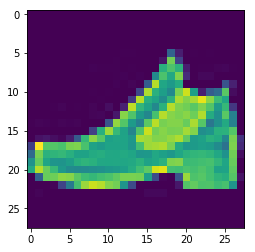

In [38]:
test_im = X_train[None, 1]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show() 

In [39]:
p = model.predict_classes(test_im)

In [40]:
print(p)

[9]


In [41]:
if p == 0:
    print("The image is of a T-shirt/Top")
if p == 1:
    print("The image is of a Trouser")
if p == 2:
    print("The image is of a pullover")
if p == 3:
    print("The image is of a dress")
if p == 4:
    print("The image is of a coat")
if p == 5:
    print("The image is of a sandal")
if p == 6:
    print("The image is of a shirt")
if p == 7:
    print("The image is of a sneaker")
if p == 8:
    print("The image is of a bag")
if p == 9:
    print("The image is of a ankle boot") #assigned values as per instruction on kaggles webpage

The image is of a ankle boot
